<a href="https://colab.research.google.com/github/raushan9jnv/MachineLearning-Projects/blob/main/Prediction%20of%20marks%20using%20Data%20Science/Predict_the_Percentage_of_Marks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction using Supervised ML**
**Author: Raushan  Kumar**
 

**Steps followed in this project:**
1. Objective
2. Dataset Content
3. Explore dataset
4. Exploratory Data Aalysis(EDA)
5. Peparing the Data
6. Implementing Linear Regression
7. Making Predictions
8. Regression Evaluation Metrics
9. Conclusion

# **OBJECTIVE**

In this Machine Learning project we have asked to predict the percentage of marks of an student based on the number of study hours.

We were given with **Student Scores** dataset and this contain one feature and target variable named **Hours** and **Scores** respectively.

# **DATASET CONTENT**

 ### <b>The Student Scores Dataset contain following features:</b>

---




1.   <b>Hours</b>- Hours of student study.
2.   <b>Scores</b>- Student score based on Hours of study.
 





# **Time to Explore and Dive into Given Dataset**

In [1]:
# Let us begin with importing libraries

import pandas as pd # data manipulation
import numpy as np  # data manipulation

import seaborn as sns # visualization tool
import matplotlib.pyplot as plt # visualization tool
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#### **I will start by importing the csv file into pandas dataframe called df_student.**

In [2]:
# Path of dataset from remote link 
url ='http://bit.ly/w-data'

In [3]:
# importing Student Scores data
df_student = pd.read_csv(url)
print("Data imported Successfully")

Data imported Successfully


### **Explore the DataFrame**

In [4]:
# print the shape of Dataframe
print(f"The shape of Student Scores Dataframe is {df_student.shape}")

The shape of Student Scores Dataframe is (25, 2)


In [5]:
# print the columns of dataframes
print(f"The columns of Student Scores Dataframe are \n \n {df_student.columns}\n")

The columns of Student Scores Dataframe are 
 
 Index(['Hours', 'Scores'], dtype='object')



In [6]:
# print the 5 head and 5 row of Student Scores Dataframe
concat_Student = pd.concat([df_student.head(5),df_student.tail(5)])
concat_Student

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
# print rows and column of play store data

print(f"There are total {df_student.shape[0]} rows and {df_student.shape[1]} columns in Student Scores Dataframe.")

There are total 25 rows and 2 columns in Student Scores Dataframe.


In [8]:
# Quick info of our dataset
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
# Names of column
df_student.columns

Index(['Hours', 'Scores'], dtype='object')

In [10]:
#Quick Statistical inforamtion of our dataset 
df_student.describe(include='all')

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Findings**

* From the above, we understand that

    1. The average time of study for a student is approx 5 hours.
    2. The average scores for student is nearly 51%.
    3. The minimum hours of study is 1.
    4. The maximum hours of study is nearly 9 that quite well for a student.
    5. The minimum Score found for a student was 17%.
    6. And the maximum score 95% that's very good.

In [11]:
def StudentInfo():
  Sinfo_df = pd.DataFrame(index=df_student.columns)
  Sinfo_df['Datatypes'] =  df_student.dtypes
  Sinfo_df['Count of non-null values'] = df_student.count()
  Sinfo_df['NaN values'] = df_student.isnull().sum()
  Sinfo_df['% NaN Values'] = (Sinfo_df['NaN values']/len(df_student)).round(4)*100   # or df_apps.isnull().mean()
  Sinfo_df['Unique_count'] = df_student.nunique()
  return Sinfo_df
StudentInfo()

,Datatypes,Count of non-null values,NaN values,% NaN Values,Unique_count
Hours,float64,25,0,0.0,23
Scores,int64,25,0,0.0,23


In [12]:
# duplicate
len(df_student[df_student.duplicated()])

0

**Findings**

* From the above, we understand that

    1. The number of null values are zero.
    2. There two types of datatype one is Float and other is Integer.
    3. We will working on continuous datatypes.
    4. Unique count is 23 for both.
    5. Our dataset is very small but well and good for analysis.
    6. And there no any duplicated value.



# **Exploratory Data Analysis**

---



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Scores')

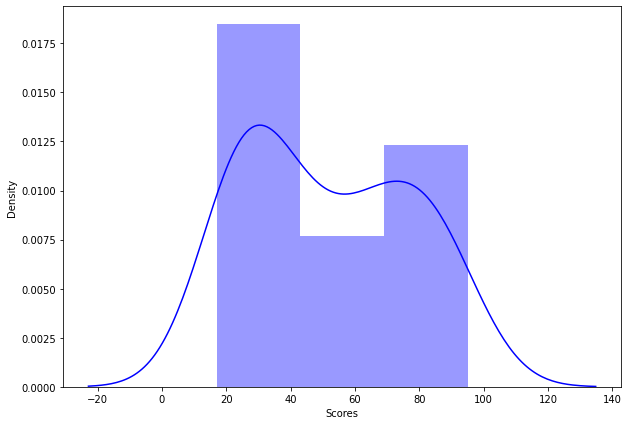

In [13]:
plt.figure(figsize=(10,7))
sns.distplot((df_student['Scores']),color='b')
plt.xlabel('Scores')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Hours')

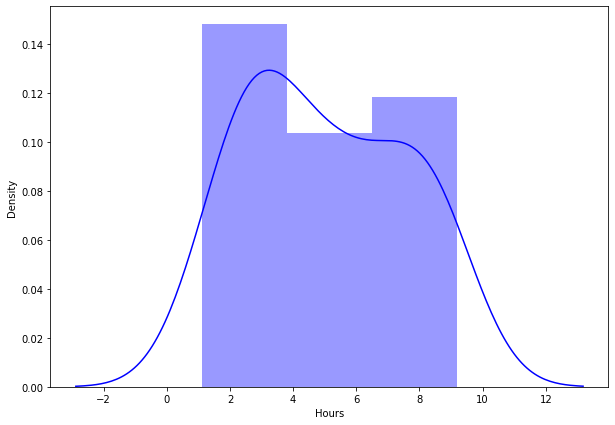

In [14]:
plt.figure(figsize=(10,7))
sns.distplot((df_student['Hours']),color='b')
plt.xlabel('Hours')

**Findings**

* From the above, we understand that

    1. Most of the scores lies between 20 and 40% followed by 80 and 95%.
    2. Most number of studies hours lies between 1 and 3 followed by 7 to 9 hours.
 



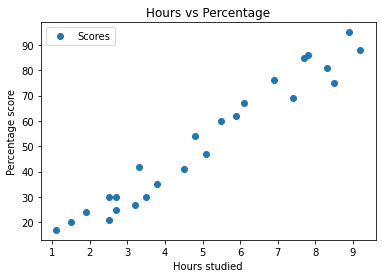

In [15]:
#plotting the distribution of scores
df_student.plot(x='Hours', y= 'Scores', style ='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.show()

**From above plot it clear their Linear relationship between Hours and percentage. so for our prediction we will use Linear regression model.**

# **Preparing the data**
___

The Next step is to divide the data into 'Attributes' (inputs) and 'labels'  (outputs).

In [16]:
X = df_student.iloc[:,:-1].values
y= df_student.iloc[:,1].values

In [17]:
X[:5] ,y[:5]

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5]]), array([21, 47, 27, 75, 30]))

# **Implementing Linear Regression**

---
Let's now begin to train out regression model! We will need to first split up our data into an train array that contains the part of dataset used for training data, and a test array used for test data.


In [18]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(20, 1)
(5, 1)


In [19]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
reg.score(X_train, y_train)

0.9515510725211553

In [21]:
reg.coef_

array([9.91065648])

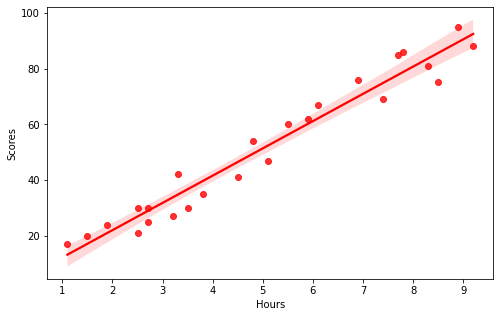

In [22]:
plt.figure(figsize=(8,5))
sns.regplot(x='Hours',y='Scores',data=df_student,color='red')

# **Making Predictions**
___

Let's trained our algorithm 

In [23]:
print(X_test)  # testing data - in hours
y_pred = reg.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [24]:
#Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [25]:
score_pred = np.array([9.25])
score_pred = score_pred.reshape(-1,1)
predict = reg.predict(score_pred)
print('No of hours{} '.format(9.25))
print('Pridicted Score{}'.format(predict[0]))

No of hours9.25 
Pridicted Score93.69173248737539


# **Regression Evaluation Metrics**

---


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:

1n∑i=1n|yi−y^i| 
 
**Mean Squared Error (MSE)** is the mean of the squared errors:

1n∑i=1n(yi−y^i)2
 
**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:

1n∑i=√1n(yi−y^i)2
 
Comparing these metrics:

**MAE** is the easiest to understand, because it's the average error.
<br>**MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
<br>**RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.
<br>All of these are loss functions, because we want to minimize them.

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

MAE=mean_absolute_error(10**(y_test), 10**(y_pred))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 1.0352994708469411e+150
MAE : 4.550383436254452e+74
RMSE : 1.0174966687154023e+75


# **Conclusion**



---
From above model we can conclude that below point:
- Average Hours of a study directly influences Scores prediction.
- Hours and Scores are highly correlated and here directly proportional to each other.
- So, Student whose Study time hour is more highly chance to score good marks.
- And from Linear Regression Model we got the accuracy of 95% that very well.



# **Thank You**
**Author : Raushan Kumar**